In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [3]:
class GMMsampler:
    
    def __init__( self, n_samples, n_components=1, weights=[1], mu=[np.array([0,0])], sig=[np.array([[1,0],[0,1]])]):
        self.n_components = n_components
        self.n_samples = n_samples
        self.weights = weights
        self.mu = mu
        self.sig = sig
        self.dim = mu[0].size
        self.data = np.empty([n_samples, self.dim])
        self.datacid = dict()
        
    def check_musig(self):
        shmu = self.mu[0].shape
        shsig = self.sig[0].shape
        if(not(all(m.shape==shmu for m in mu))):
            print('all mean vectors must be of same dimension')
        if(not(all(s.shape==shmu for s in sig))):
            print('all covariance matrix must be of same dimension')
    
    def gen_sample(self):
        for i in range(self.n_components):
            self.datacid[i] = []
        for i in range(self.n_samples):
            idx = np.random.choice(np.arange(0,self.n_components), p=(self.weights)/np.sum(self.weights))
            mu_,sig_ = self.mu[idx], self.sig[idx]
            self.data[i,:] = np.random.multivariate_normal(mu_, sig_)
            self.datacid[idx].append(self.data[i,:])
        for idx in range(self.n_components):
            self.datacid[idx] = np.array(self.datacid[idx]).reshape(-1,2)

In [15]:
m1 = np.array([-1, 0])
m2 = np.array([1, 0])
m3 = np.array([0, 1])
m4 = np.array([0, -1])
m5 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
m6 = np.array([1/np.sqrt(2), -1/np.sqrt(2)])
m7 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)])
m8 = np.array([-1/np.sqrt(2), -1/np.sqrt(2)])

sig1 = np.eye(2)*0.1414
sig2 = np.eye(2)*0.1414
sig3 = np.eye(2)*0.1414
sig4 = np.eye(2)*0.1414
sig5 = np.eye(2)*0.1414
sig6 = np.eye(2)*0.1414
sig7 = np.eye(2)*0.1414
sig8 = np.eye(2)*0.1414

g = GMMsampler(1000,8,weights=[0.130, 0.128, 0.122, 0.120, 0.121, 0.129, 0.123, 0.127], mu=[m1, m2, m3, m4, m5, m6, m7, m8], sig=[sig1, sig2, sig3, sig4, sig5, sig6, sig7, sig8])

In [12]:
np.eye(2)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [19]:
g.gen_sample()

In [20]:
g.datacid[0][:,1]

array([ 0.33741084,  0.09875927, -0.25426477, -0.32002608, -0.10457575,
       -0.26033599, -0.5016852 , -0.15328854,  0.40389852,  0.13997563,
        0.00440241, -0.26580929, -0.24647362, -0.34294241, -0.36267625,
        0.07180529, -0.15277205, -0.21206784, -0.2814015 ,  0.36730038,
       -0.1263645 ,  0.13547552,  0.07256106,  0.42005214,  0.49692764,
        0.31645893, -0.24786571,  0.03367928, -0.04441027,  0.08067637,
       -0.58246984,  0.2666813 , -0.58133034, -0.7588407 ,  0.45543724,
        0.63314192, -0.04563118, -0.66262987,  0.04433204, -0.65075955,
       -0.69320576, -0.10488489, -0.0609224 ,  0.05380747,  0.37207804,
        0.17973448, -0.01007731,  0.16228033, -0.37649734, -0.03056975,
       -0.16476375,  0.13531022, -0.43137163, -0.07873459,  0.41084625,
       -0.39443229, -0.06472759, -0.2782023 , -0.55445867, -0.0093498 ,
       -0.14952833,  0.35923231,  0.30782005,  0.12811535, -0.12247469,
       -0.33273211,  0.26725391,  0.49115989,  0.02868631,  0.32

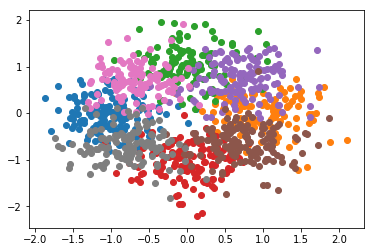

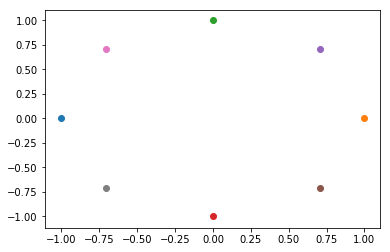

In [21]:
#plt.scatter(g.data[:,0],g.data[:,1])
plt.figure()
plt.scatter(g.datacid[0][:,0], g.datacid[0][:,1])
plt.scatter(g.datacid[1][:,0], g.datacid[1][:,1])
plt.scatter(g.datacid[2][:,0], g.datacid[2][:,1])
plt.scatter(g.datacid[3][:,0], g.datacid[3][:,1])
plt.scatter(g.datacid[4][:,0], g.datacid[4][:,1])
plt.scatter(g.datacid[5][:,0], g.datacid[5][:,1])
plt.scatter(g.datacid[6][:,0], g.datacid[6][:,1])
plt.scatter(g.datacid[7][:,0], g.datacid[7][:,1])
plt.show()

plt.figure()
plt.scatter(m1[0],m1[1])
plt.scatter(m2[0],m2[1])
plt.scatter(m3[0],m3[1])
plt.scatter(m4[0],m4[1])
plt.scatter(m5[0],m5[1])
plt.scatter(m6[0],m6[1])
plt.scatter(m7[0],m7[1])
plt.scatter(m8[0],m8[1])
plt.show()